In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
sns.set(rc = {'figure.figsize':(16,9)}, font_scale = 1.5)

In [17]:
# Display raw data
df_375 = pd.read_excel(io = "time_series_375_preprocess_en.xlsx")

df_375

,PATIENT_ID,RE_DATE,age,gender,Admission time,Discharge time,outcome,Hypersensitive cardiac troponinI,hemoglobin,Serum chloride,...,mean corpuscular hemoglobin,Activation of partial thromboplastin time,Hypersensitive c-reactive protein,HIV antibody quantification,serum sodium,thrombocytocrit,ESR,glutamic-pyruvic transaminase,eGFR,creatinine
0,1.0,2020-01-31 01:09:00,73,1,2020-01-30 22:12:47,2020-02-17 12:40:09,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,2020-01-31 01:25:00,73,1,2020-01-30 22:12:47,2020-02-17 12:40:09,0,NaN,136.0,NaN,...,31.9,NaN,NaN,NaN,NaN,0.12,NaN,NaN,NaN,NaN
2,NaN,2020-01-31 01:44:00,73,1,2020-01-30 22:12:47,2020-02-17 12:40:09,0,NaN,NaN,103.1,...,NaN,NaN,43.1,NaN,137.7,NaN,NaN,16.0,46.6,130.0
3,NaN,2020-01-31 01:45:00,73,1,2020-01-30 22:12:47,2020-02-17 12:40:09,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,2020-01-31 01:56:00,73,1,2020-01-30 22:12:47,2020-02-17 12:40:09,0,19.9,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6115,NaN,2020-02-16 11:21:00,68,1,2020-02-08 23:25:01,2020-02-19 01:31:58,1,84.9,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6116,NaN,2020-02-16 12:04:00,68,1,2020-02-08 23:25:01,2020-02-19 01:31:58,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6117,NaN,2020-02-16 12:14:00,68,1,2020-02-08 23:25:01,2020-02-19 01:31:58,1,NaN,NaN,105.2,...,NaN,NaN,267.0,NaN,139.3,NaN,NaN,17.0,88.6,77.0
6118,NaN,2020-02-16 14:11:00,68,1,2020-02-08 23:25:01,2020-02-19 01:31:58,1,NaN,155.0,NaN,...,31.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Research

After a review of the findings of multiple studies in the field, we have selected a set of biomarkers for our project. These biomarkers have been identified as key indicators for predicting mortality and disease severity in COVID-19 patients. The inclusion of these specific biomarkers in our analysis is supported by their established roles in reflecting critical physiological processes relevant to COVID-19 prognosis.

|Biomarker|Description|
|:-------|:--------|
|Hypersensitive cardiac troponinI|Hypersentitive tropinin I is a biomarker for the detection of cardnial injury, patients with elevated tropinin I levels had a higher odds of poor outcome|
|Prothrombin time|Pothrombin time represents the amount of time it takes for a blood clot to form|
|procalcitonin|This is a marker of bacterial infection, and elevated levels have been associated with increased mortality in COVID-19 patients
|(%)lymphocyte|A lymphocyte is a type of white blood cellthat is part of the immune system. A low lymphocyte count will result in a disorder called lymphocytopenia which will make an individual more prone to infections.|
|D-D dimer|D-dimer is a protein in the body that breaks down blood clots. Elevated levels have been found to decrease your likelihood of surviving COVID-19. A D-dimer level of above 2.01ug/ml is a significant predictor or subsequent deaths|
|Lactate dehydrogenase|Lactate dehydrogenase is an exzyme that the body uses to turn sugar into energy. Elevated levels indicate tissue damage as they are releasen into the bloodstream. Elevated LDH is associated with a poor outcome in COVID-19|
|Interleukin 6|This is a cytokine involved in inflammation and immune response, and elevated levels have been associated with increased mortality in COVID-19 patients.|
|Hypersensitive c-reactive protein|This is a marker of inflammation that predicts various cardiac diseases.|  

In [18]:
# Choose biomarkers
biomarkers = ['Hypersensitive cardiac troponinI', 'Prothrombin time', 'procalcitonin', '(%)lymphocyte', 'D-D dimer', 'Lactate dehydrogenase', 'Interleukin 6', 'Hypersensitive c-reactive protein']
patient_data = ['PATIENT_ID', 'outcome']
df = df_375.loc[:, patient_data + biomarkers]

# Fill up empty patient IDs
df['PATIENT_ID'] = df['PATIENT_ID'].ffill()
df = df.fillna(0)

# Find the average value of the biomarkers for each patient
df = df.groupby(patient_data)[biomarkers].apply(lambda x: x[x != 0].mean()).round(1).reset_index()

# Drop the patients with no biomarkers recorded
df = df.dropna(subset=df.columns.difference(['PATIENT_ID', 'outcome']), how='all')

df

,PATIENT_ID,outcome,Hypersensitive cardiac troponinI,Prothrombin time,procalcitonin,(%)lymphocyte,D-D dimer,Lactate dehydrogenase,Interleukin 6,Hypersensitive c-reactive protein
0,1.0,0,19.9,13.5,0.1,22.7,1.3,232.0,NaN,16.4
1,2.0,0,6.9,13.3,0.1,13.6,0.7,450.2,38.6,27.4
2,3.0,0,NaN,13.6,0.1,26.5,1.0,274.3,47.8,23.0
3,4.0,0,4.8,16.3,0.4,18.2,1.3,293.5,NaN,61.4
4,5.0,0,5.6,14.6,0.0,30.7,0.4,187.0,1.5,3.9
...,...,...,...,...,...,...,...,...,...,...
370,371.0,1,1741.5,14.4,1.5,15.0,2.6,573.0,248.9,152.0
371,372.0,1,30.7,17.9,1.6,1.6,4.2,383.7,284.3,232.2
372,373.0,1,124.8,14.9,0.6,6.3,NaN,702.0,NaN,205.8
373,374.0,1,372.4,23.2,NaN,2.3,21.0,1706.3,23.2,109.8


In [19]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
df = pd.DataFrame(imputer.fit_transform(df).round(1))
df.rename(columns={0: 'PATIENT_ID', 1: 'outcome', 2: 'Hypersensitive cardiac troponinI', 3: 'Prothrombin time', 4: 'procalcitonin', 5: '(%)lymphocyte', 6: 'D-D dimer', 7: 'Lactate dehydrogenase', 8: 'Interleukin 6', 9: 'Hypersensitive c-reactive protein'}, inplace=True)

df

,PATIENT_ID,outcome,Hypersensitive cardiac troponinI,Prothrombin time,procalcitonin,(%)lymphocyte,D-D dimer,Lactate dehydrogenase,Interleukin 6,Hypersensitive c-reactive protein
0,1.0,0.0,19.9,13.5,0.1,22.7,1.3,232.0,107.4,16.4
1,2.0,0.0,6.9,13.3,0.1,13.6,0.7,450.2,38.6,27.4
2,3.0,0.0,766.0,13.6,0.1,26.5,1.0,274.3,47.8,23.0
3,4.0,0.0,4.8,16.3,0.4,18.2,1.3,293.5,107.4,61.4
4,5.0,0.0,5.6,14.6,0.0,30.7,0.4,187.0,1.5,3.9
...,...,...,...,...,...,...,...,...,...,...
354,371.0,1.0,1741.5,14.4,1.5,15.0,2.6,573.0,248.9,152.0
355,372.0,1.0,30.7,17.9,1.6,1.6,4.2,383.7,284.3,232.2
356,373.0,1.0,124.8,14.9,0.6,6.3,6.2,702.0,107.4,205.8
357,374.0,1.0,372.4,23.2,0.9,2.3,21.0,1706.3,23.2,109.8


In [20]:
from sklearn.model_selection import train_test_split

# Prepare features and targets
X = df.drop(['outcome', 'PATIENT_ID'], axis=1) # Features
y = df['outcome'] # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the training and testing sets
print("Training set shape: X_train={}, y_train={}".format(X_train.shape, y_train.shape))
print("Testing set shape: X_test={}, y_test={}".format(X_test.shape, y_test.shape))


Training set shape: X_train=(287, 8), y_train=(287,)
Testing set shape: X_test=(72, 8), y_test=(72,)


Accuracy: 0.9583333333333334
f1 score:  0.9538461538461539


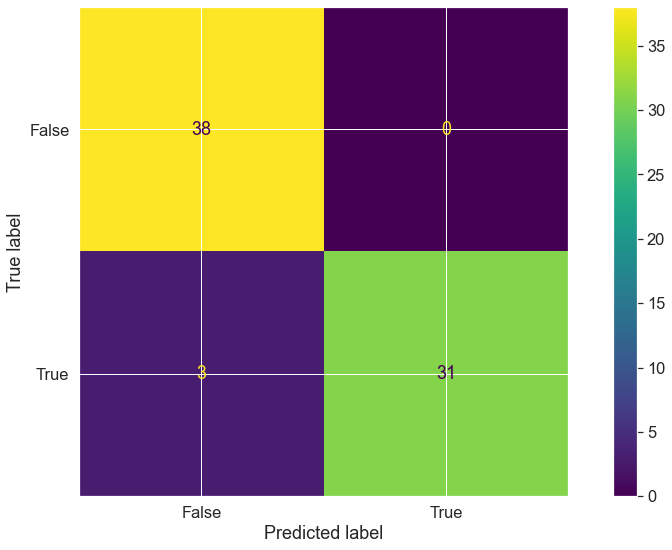

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# Create Logistic Regression model
logreg = LogisticRegression(max_iter=10000)

# Train model
result = logreg.fit(X_train, y_train)

# Predict
y_pred = logreg.predict(X_test)

# Evaluate the model's performance
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)
# print(result.coef_)
print('f1 score: ', metrics.f1_score(y_test, y_pred))

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
confusion_matrix = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
confusion_matrix.plot()
plt.show()

0.9583333333333334

[[ 0.00197037  0.0017552  -0.00360915 -0.21170058  0.04328087  0.00830639
   0.00049895  0.01547741]]
   
   f1 = 0.9538461538461539

Try Decision tree and random forrest  
F1 score   
look into other metrics to test the accuracy of the model

Accuracy: 0.9305555555555556
f1 score:  0.9275362318840579


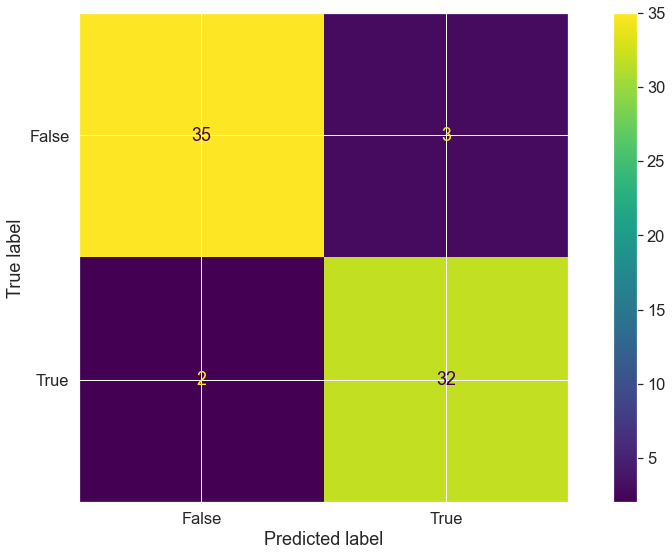

In [22]:
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree classifier
dt = DecisionTreeClassifier()

# Train model
dt.fit(X_train, y_train)

# Predict
y_pred = dt.predict(X_test)

# Evaluate the model's performance
accuracy = dt.score(X_test, y_test)
print("Accuracy:", accuracy)
print('f1 score: ', metrics.f1_score(y_test, y_pred))
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
confusion_matrix = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
confusion_matrix.plot()
plt.show()

Accuracy: 0.9583333333333334
f1 score:  0.955223880597015


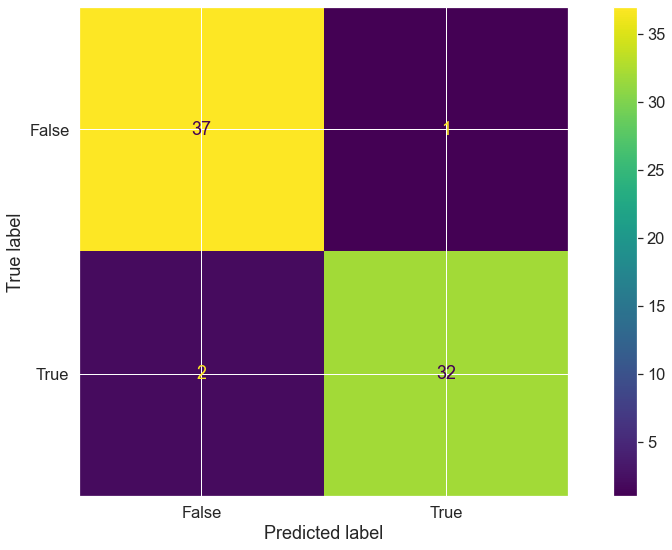

In [23]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier
rf = RandomForestClassifier()

# Train model
rf.fit(X_train, y_train)

# Predict
y_pred = rf.predict(X_test)

# Evaluate the model's performance
accuracy = rf.score(X_test, y_test)
print("Accuracy:", accuracy)
print('f1 score: ', metrics.f1_score(y_test, y_pred))
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
confusion_matrix = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
confusion_matrix.plot()
plt.show()

#### Logistic Regression
Accuracy: 0.9583333333333334  
f1 score:  0.9538461538461539

#### Decision Tree
Accuracy: 0.9166666666666666  
f1 score:  0.9117647058823528

#### Random Forrest
Accuracy: 0.9583333333333334   
f1 score:  0.955223880597015